In [1]:
%load_ext autoreload
# %load_ext autoreload
%autoreload 2
import pickle
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.linalg import expm 
from numpy.linalg import norm
from datetime import datetime
from scipy.spatial.distance import squareform,pdist
from sklearn.utils import shuffle
from sklearn.manifold import MDS
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D 
from scipy.stats import multivariate_normal
from scipy.stats import zscore
from matplotlib import cm
from utils import *
# from plotting import *
from matplotlib import cm 
import matplotlib as mpl 
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.use14corefonts'] = True

# Fig 1: Main Experiment

In [3]:

N_STIM = 25
N_CTX = 2
N_HIDDEN = 100
N_OUT = 1
N_RUNS = 30
N_ITER = 10000
LRATE = 5e-3
SCALE_WHXS = np.asarray([1e-2,1e-1,2e-1,3e-1,4e-1,1,2,3])

N_FACTORS = len(SCALE_WHXS)
scale_labels = [str(ii) for ii in SCALE_WHXS]

# # open results (was 'results_nnet_main_withacc_withmlp_stepscaled.pickle)
with open('/media/timo/data/DPHIL_01_TREES_FMRI/Paper/code/Data/Simulations/mlp/results_nnet_main_withacc_withmlp_stepscaled.pickle','rb') as f:
        results = pickle.load(f)



        

## Fig. 1c Upper - Relative Weight Change (Hidden Layer)

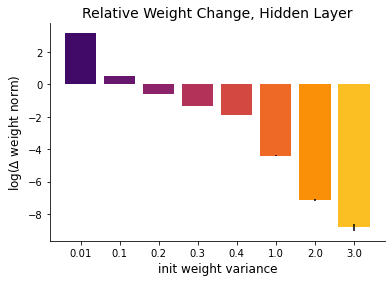

In [23]:
%matplotlib inline
SCALE_WHXS = np.asarray([1e-2,1e-1,2e-1,3e-1,4e-1,1,2,3])


ws = results['w_relchange_hxs'][:,:,-1]

N_RUNS = ws.shape[1]
cols = cm.inferno(np.linspace(.2,.85,8))

plt.figure()
for ii in range(ws.shape[0]):
    plt.bar(ii,np.mean(np.log(np.abs(ws[ii,:])),0),yerr=np.std(np.log(np.abs(ws[ii,:])),0)/np.sqrt(N_RUNS),zorder=3,color=cols[ii,:])

plt.xticks(ticks=np.arange(0,len(SCALE_WHXS)),labels=scale_labels)
plt.title('Relative Weight Change, Hidden Layer',fontsize=14)
plt.ylabel('log($\Delta$ weight norm)',fontsize=12)
plt.xlabel('init weight variance',fontsize=12)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)




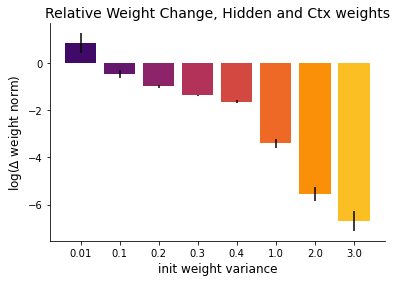

In [22]:

SCALE_WHXS = np.asarray([1e-2,1e-1,2e-1,3e-1,4e-1,1,2,3])


ws = results['w_relchange_hxs'][:,:,-1]
wc = results['w_relchange_hxc'][:,:,-1]
N_RUNS = ws.shape[1]
cols = cm.inferno(np.linspace(.2,.85,8))

plt.figure()
for ii in range(ws.shape[0]):
    plt.bar(ii,np.mean(np.log(np.abs(np.concatenate((ws[ii,:],wc[ii,:]),axis=0))),0),yerr=np.std(np.log(np.abs(np.concatenate((ws[ii,:],wc[ii,:]),axis=0))),0)/np.sqrt(N_RUNS),zorder=3,color=cols[ii,:])

plt.xticks(ticks=np.arange(0,len(SCALE_WHXS)),labels=scale_labels)
plt.title('Relative Weight Change, Hidden and Ctx weights',fontsize=14)
plt.ylabel('log($\Delta$ weight norm)',fontsize=12)
plt.xlabel('init weight variance',fontsize=12)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)




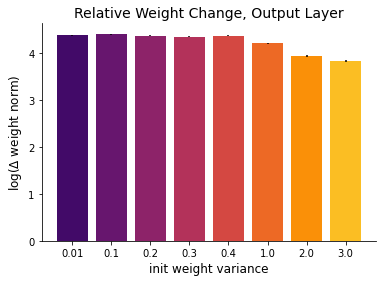

In [27]:
%matplotlib inline
SCALE_WHXS = np.asarray([1e-2,1e-1,2e-1,3e-1,4e-1,1,2,3])


ws = results['w_relchange_yh'][:,:,-1]

N_RUNS = ws.shape[1]
cols = cm.inferno(np.linspace(.2,.85,8))

plt.figure()
for ii in range(ws.shape[0]):
    plt.bar(ii,np.mean(np.log(np.abs(ws[ii,:])),0),yerr=np.std(np.log(np.abs(ws[ii,:])),0)/np.sqrt(N_RUNS),zorder=3,color=cols[ii,:])

plt.xticks(ticks=np.arange(0,len(SCALE_WHXS)),labels=scale_labels)
plt.title('Relative Weight Change, Output Layer',fontsize=14)
plt.ylabel('log($\Delta$ weight norm)',fontsize=12)
plt.xlabel('init weight variance',fontsize=12)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)




## Fig. 1c Lower - Endpoint Weight Norms

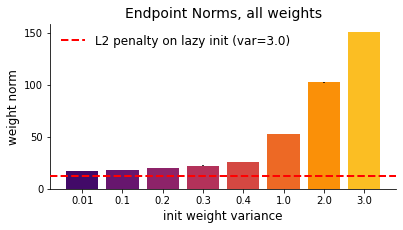

In [28]:
def comp_norms(weights):
    norms = np.empty((8,N_RUNS))
    for ii in range(8):
        for jj in range(N_RUNS):
            norms[ii,jj] = np.linalg.norm(weights[ii,jj,:,:].flatten())
    return norms

def plot_norms(norms,titlestr,zorder=1,colors=np.repeat([1,0,0],8,axis=0)):
    for ii in range(8):
        plt.bar(ii,np.mean(norms[ii,:],0),yerr=np.std(norms[ii,:],0)/np.sqrt(len(norms[ii,:])),zorder=zorder,color=colors[ii,:])
    plt.title(titlestr,fontsize=14)
    plt.ylabel('norm')
    plt.xticks(ticks=np.arange(0,8),labels=[str(i) for i in SCALE_WHXS])
    plt.xlabel('scaling factor')


with open('/media/timo/data/DPHIL_01_TREES_FMRI/Paper/code/Data/Simulations/mlp/results_nnet_l2loss.pickle','rb') as f:
    norm_res = pickle.load(f)

norms = np.empty((8,N_RUNS))
for ii in range(8):
    for jj in range(N_RUNS):
        norms[ii,jj] = np.linalg.norm(np.concatenate((norm_res['all_w_hxs'][ii,jj,:,:].flatten(),norm_res['all_w_hxc'][ii,jj,:,:].flatten(),norm_res['all_w_yh'][ii,jj,:,:].flatten()),axis=0))

norm_l2 = np.mean(norms,1)[0]

f = plt.figure(figsize=(5.7,3.3))

norms = np.empty((8,N_RUNS))
cols = cm.inferno(np.linspace(.2,.85,8))
for ii in range(8):
    for jj in range(N_RUNS):
        norms[ii,jj] = np.linalg.norm(np.concatenate((results['all_w_hxs'][ii,jj,:,:].flatten(),results['all_w_hxc'][ii,jj,:,:].flatten(),results['all_w_yh'][ii,jj,:,:].flatten()),axis=0))
        
plot_norms(norms,'Endpoint Norms, all weights',zorder=3,colors=cols)
plt.xticks(ticks=np.arange(0,len(SCALE_WHXS)),labels=scale_labels)

plt.ylabel('weight norm',fontsize=12)
plt.xlabel('init weight variance',fontsize=12)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
lims = plt.xlim()
bs = plt.plot(lims,[norm_l2]*2,'r--',zorder=4,linewidth=2)
plt.xlim(lims)
plt.legend(bs,['L2 penalty on lazy init (var=3.0)'],fontsize=12,frameon=False)
plt.yticks(ticks=np.arange(0,160,50))
plt.tight_layout()

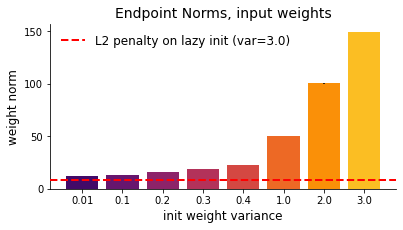

In [34]:
def comp_norms(weights):
    norms = np.empty((8,N_RUNS))
    for ii in range(8):
        for jj in range(N_RUNS):
            norms[ii,jj] = np.linalg.norm(weights[ii,jj,:,:].flatten())
    return norms

def plot_norms(norms,titlestr,zorder=1,colors=np.repeat([1,0,0],8,axis=0)):
    for ii in range(8):
        plt.bar(ii,np.mean(norms[ii,:],0),yerr=np.std(norms[ii,:],0)/np.sqrt(len(norms[ii,:])),zorder=zorder,color=colors[ii,:])
    plt.title(titlestr,fontsize=14)
    plt.ylabel('norm')
    plt.xticks(ticks=np.arange(0,8),labels=[str(i) for i in SCALE_WHXS])
    plt.xlabel('scaling factor')


with open('/media/timo/data/DPHIL_01_TREES_FMRI/Paper/code/Data/Simulations/mlp/results_nnet_l2loss.pickle','rb') as f:
    norm_res = pickle.load(f)

norms = np.empty((8,N_RUNS))
for ii in range(8):
    for jj in range(N_RUNS):
        norms[ii,jj] = np.linalg.norm(norm_res['all_w_hxs'][ii,jj,:,:].flatten())

norm_l2 = np.mean(norms,1)[0]

f = plt.figure(figsize=(5.7,3.3))

norms = np.empty((8,N_RUNS))
cols = cm.inferno(np.linspace(.2,.85,8))
for ii in range(8):
    for jj in range(N_RUNS):
        norms[ii,jj] = np.linalg.norm(results['all_w_hxs'][ii,jj,:,:].flatten())
        
plot_norms(norms,'Endpoint Norms, input weights',zorder=3,colors=cols)
plt.xticks(ticks=np.arange(0,len(SCALE_WHXS)),labels=scale_labels)

plt.ylabel('weight norm',fontsize=12)
plt.xlabel('init weight variance',fontsize=12)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
lims = plt.xlim()
bs = plt.plot(lims,[norm_l2]*2,'r--',zorder=4,linewidth=2)
plt.xlim(lims)
plt.legend(bs,['L2 penalty on lazy init (var=3.0)'],fontsize=12,frameon=False)
plt.yticks(ticks=np.arange(0,160,50))
plt.tight_layout()

In [ ]:
plt.tight_layout()

## Fig 1d - MDS for Lazy vs Rich

In [250]:
import math
# helper functions
def rotate_axes(x,y,theta):
    # theta is in degrees
    theta_rad = theta * (math.pi/180)  # convert to radians
    x_new = x * math.cos(theta_rad) + y * math.sin(theta_rad)
    y_new =  -x * math.sin(theta_rad) + y * math.cos(theta_rad)
    return x_new, y_new

def rotate(X, theta, axis='x'):
    '''Rotate multidimensional array `X` `theta` degrees around axis `axis`'''
    theta = theta * (math.pi/180)  # convert to radians
    c, s = np.cos(theta), np.sin(theta)
    if axis == 'x': return np.dot(X, np.array([
        [1.,  0,  0],
        [0 ,  c, -s],
        [0 ,  s,  c]
        ]))
    elif axis == 'y': return np.dot(X, np.array([
        [c,  0,  -s],
        [0,  1,   0],
        [s,  0,   c]
        ]))
    elif axis == 'z': return np.dot(X, np.array([
        [c, -s,  0 ],
        [s,  c,  0 ],
        [0,  0,  1.],
        ]))

In [404]:
# perform mds 
# hidden layer mds of endpoints
dimensionality = 2

y = results['all_y_hidden']
print(y.shape)
rdms = np.empty((2,N_RUNS,50,50))
for ii in range(N_RUNS):
    rdms[0,ii,:,:] = squareform(pdist(y[0,ii,:,:].T,metric='euclidean'))
for ii in range(N_RUNS):
    rdms[1,ii,:,:] = squareform(pdist(y[-1,ii,:,:].T,metric='euclidean'))

labels = ['feature learning regime', 'lazy learning regime']
fig=plt.figure(1,figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
for ii in range(2):
    plt.subplot(1,2,ii+1)
    plt.imshow(np.mean(rdms[ii,:,:,:],0))
    plt.title(labels[ii])


embedding = MDS(n_components=3,n_init=10,max_iter=10000,metric=True)

xyz_rich = embedding.fit_transform(np.mean(rdms[0,:,:,:],0))
xyz_lazy = embedding.fit_transform(np.mean(rdms[1,:,:,:],0))
embeddings = {'rich':xyz_rich, 'lazy':xyz_lazy}




(8, 3, 100, 50)


In [252]:
%matplotlib qt
# plot rich regime
# with open('mds_embeddings.pickle','rb') as f:
#         embeddings = pickle.load(f)
theta_x = 20
theta_y = 90
theta_z = 10

xyz_rot = rotate(embeddings['rich'],theta_x,axis='x')
xyz_rot = rotate(xyz_rot,theta_y,axis='y')
xyz_rot = rotate(xyz_rot,theta_z,axis='z')

plt.close()
fig = plt.figure(2,figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
    
plt.subplot(1,2,1)
plot_grid2(xyz_rot[0:25,[0,1]],line_colour=(0, 0, .5),fig_id=2)
plot_grid2(xyz_rot[25:,[0,1]],line_colour="orange",fig_id=2)
scatter_mds_2(xyz_rot[:,[0,1]],fig_id=2,task_id='both')
ax = plt.gca()
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])    
xls = plt.xticks()[0]
plt.xticks(ticks=[xls[0],xls[-1]],fontsize=14)
yls = plt.yticks()[0]
plt.yticks(ticks=[yls[0],yls[-1]],fontsize=14)
# plt.title('Rich Regime',fontsize=14)
plt.xlabel('Dimension 1',fontsize=14)
plt.ylabel('Dimension 2',fontsize=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.subplot(1,2,2)
plot_grid2(xyz_rot[0:25,[1,2]],line_colour=(0, 0, .5),fig_id=2)
plot_grid2(xyz_rot[25:,[1,2]],line_colour="orange",fig_id=2)
scatter_mds_2(xyz_rot[:,[1,2]],fig_id=2,task_id='both')
ax = plt.gca()
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
xls = plt.xticks()[0]
plt.xticks(ticks=[xls[0],xls[-1]],fontsize=14)
yls = plt.yticks()[0]
plt.yticks(ticks=[yls[0],yls[-1]],fontsize=14)
plt.xlabel('Dimension 2',fontsize=14)
plt.ylabel('Dimension 3',fontsize=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [253]:
# plot lazy regime
# with open('mds_embeddings.pickle','rb') as f:
#         embeddings = pickle.load(f)
theta_x = 12
theta_y = -68
theta_z = 0

xyz_rot = rotate(embeddings['lazy'],theta_x,axis='x')
xyz_rot = rotate(xyz_rot,theta_y,axis='y')
xyz_rot = rotate(xyz_rot,theta_z,axis='z')

plt.close()
fig = plt.figure(2,figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
    
plt.subplot(1,2,1)
plot_grid2(xyz_rot[0:25,[0,1]],line_colour=(0, 0, .5),fig_id=2)
plot_grid2(xyz_rot[25:,[0,1]],line_colour="orange",fig_id=2)
scatter_mds_2(xyz_rot[:,[0,1]],fig_id=2,task_id='both')
ax = plt.gca()
ax.set_xlim([-4.5,4.5])
ax.set_ylim([-4.5,4.5])    
xls = plt.xticks()[0]
plt.xticks(ticks=[xls[0],xls[-1]],fontsize=14)
yls = plt.yticks()[0]
plt.yticks(ticks=[yls[0],yls[-1]],fontsize=14)
# plt.title('Rich Regime',fontsize=14)
plt.xlabel('Dimension 1',fontsize=14)
plt.ylabel('Dimension 2',fontsize=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.subplot(1,2,2)
plot_grid2(xyz_rot[0:25,[1,2]],line_colour=(0, 0, .5),fig_id=2)
plot_grid2(xyz_rot[25:,[1,2]],line_colour="orange",fig_id=2)
scatter_mds_2(xyz_rot[:,[1,2]],fig_id=2,task_id='both')
ax = plt.gca()
ax.set_xlim([-4.5,4.5])
ax.set_ylim([-4.5,4.5])
xls = plt.xticks()[0]
plt.xticks(ticks=[xls[0],xls[-1]],fontsize=14)
yls = plt.yticks()[0]
plt.yticks(ticks=[yls[0],yls[-1]],fontsize=14)
plt.xlabel('Dimension 2',fontsize=14)
plt.ylabel('Dimension 3',fontsize=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [ ]:
g = plt.gcf()
print(g.get_figwidth())
print(g.get_figheight())

## Fig 1d: Model RSA

In [35]:
_,_,xyz = gen_modelrdms(monitor=0)
t = xyz[0,0:25,[0,1]].T
t.shape

(25, 2)

(3, 50, 3)


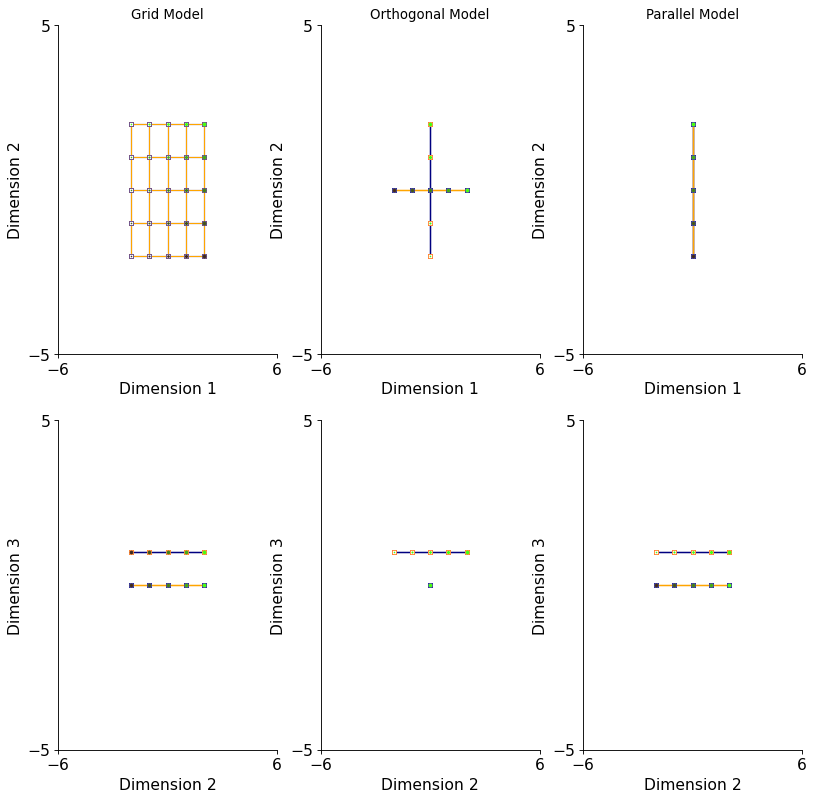

In [36]:
# display model rdms
_,_,xyz = gen_modelrdms(monitor=0)
print(xyz.shape)
plt.close()
fig = plt.figure(2,figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')
# grid model    
plt.subplot(2,3,1)
plot_grid2(xyz[0,0:25,[0,1]].T,line_colour=(0, 0, .5),fig_id=2)
plot_grid2(xyz[0,25:,[0,1]].T,line_colour="orange",fig_id=2)
scatter_mds_2(xyz[0,:,[0,1]].T,fig_id=2,task_id='both')
ax = plt.gca()
ax.set_xlim([-4.5,4.5])
ax.set_ylim([-4.5,4.5])    
xls = plt.xticks()[0]
plt.xticks(ticks=[xls[0],xls[-1]],fontsize=14)
yls = plt.yticks()[0]
plt.yticks(ticks=[yls[0],yls[-1]],fontsize=14)
plt.xlabel('Dimension 1',fontsize=14)
plt.ylabel('Dimension 2',fontsize=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Grid Model')
plt.subplot(2,3,4)
plot_grid2(xyz[0,0:25,[1,2]].T,line_colour=(0, 0, .5),fig_id=2)
plot_grid2(xyz[0,25:,[1,2]].T,line_colour="orange",fig_id=2)
scatter_mds_2(xyz[0,:,[1,2]].T,fig_id=2,task_id='both')
ax = plt.gca()
ax.set_xlim([-4.5,4.5])
ax.set_ylim([-4.5,4.5])
xls = plt.xticks()[0]
plt.xticks(ticks=[xls[0],xls[-1]],fontsize=14)
yls = plt.yticks()[0]
plt.yticks(ticks=[yls[0],yls[-1]],fontsize=14)
plt.xlabel('Dimension 2',fontsize=14)
plt.ylabel('Dimension 3',fontsize=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# orthogonal model    
plt.subplot(2,3,2)
plot_grid2(xyz[1,0:25,[1,0]].T,line_colour=(0, 0, .5),fig_id=2)
plot_grid2(xyz[1,25:,[1,0]].T,line_colour="orange",fig_id=2)
scatter_mds_2(xyz[1,:,[1,0]].T,fig_id=2,task_id='both')
ax = plt.gca()
ax.set_xlim([-4.5,4.5])
ax.set_ylim([-4.5,4.5])    
xls = plt.xticks()[0]
plt.xticks(ticks=[xls[0],xls[-1]],fontsize=14)
yls = plt.yticks()[0]
plt.yticks(ticks=[yls[0],yls[-1]],fontsize=14)
plt.xlabel('Dimension 1',fontsize=14)
plt.ylabel('Dimension 2',fontsize=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Orthogonal Model')
plt.subplot(2,3,5)
plot_grid2(xyz[1,0:25,[0,2]].T,line_colour=(0, 0, .5),fig_id=2)
plot_grid2(xyz[1,25:,[0,2]].T,line_colour="orange",fig_id=2)
scatter_mds_2(xyz[1,:,[0,2]].T,fig_id=2,task_id='both')
ax = plt.gca()
ax.set_xlim([-4.5,4.5])
ax.set_ylim([-4.5,4.5])
xls = plt.xticks()[0]
plt.xticks(ticks=[xls[0],xls[-1]],fontsize=14)
yls = plt.yticks()[0]
plt.yticks(ticks=[yls[0],yls[-1]],fontsize=14)
plt.xlabel('Dimension 2',fontsize=14)
plt.ylabel('Dimension 3',fontsize=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# parallel model    
plt.subplot(2,3,3)
plot_grid2(xyz[2,0:25,[0,1]].T,line_colour=(0, 0, .5),fig_id=2)
plot_grid2(xyz[2,25:,[0,1]].T,line_colour="orange",fig_id=2)
scatter_mds_2(xyz[2,:,[0,1]].T,fig_id=2,task_id='both')
ax = plt.gca()
ax.set_xlim([-4.5,4.5])
ax.set_ylim([-4.5,4.5])    
xls = plt.xticks()[0]
plt.xticks(ticks=[xls[0],xls[-1]],fontsize=14)
yls = plt.yticks()[0]
plt.yticks(ticks=[yls[0],yls[-1]],fontsize=14)
plt.xlabel('Dimension 1',fontsize=14)
plt.ylabel('Dimension 2',fontsize=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Parallel Model')
plt.subplot(2,3,6)
plot_grid2(xyz[2,0:25,[1,2]].T,line_colour=(0, 0, .5),fig_id=2)
plot_grid2(xyz[2,25:,[1,2]].T,line_colour="orange",fig_id=2)
scatter_mds_2(xyz[2,:,[1,2]].T,fig_id=2,task_id='both')
ax = plt.gca()
ax.set_xlim([-4.5,4.5])
ax.set_ylim([-4.5,4.5])
xls = plt.xticks()[0]
plt.xticks(ticks=[xls[0],xls[-1]],fontsize=14)
yls = plt.yticks()[0]
plt.yticks(ticks=[yls[0],yls[-1]],fontsize=14)
plt.xlabel('Dimension 2',fontsize=14)
plt.ylabel('Dimension 3',fontsize=14)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [37]:

%matplotlib qt

_, dmat,xyz = gen_modelrdms(monitor=0)

_,_,_ = stats_fit_rdms(dmat,results['all_y_hidden'],runlabel='init weight variance',runvalue=SCALE_WHXS, monitor=1)



TypeError: stats_fit_rdms() got an unexpected keyword argument 'runlabel'

## Fig 1e: SVD Accuracy

In [16]:
nmax=10
norms = np.empty((8,N_RUNS))
for ii in range(8):
    for jj in range(N_RUNS):
        norms[ii,jj] = np.linalg.norm(np.concatenate((results['all_w_hxs'][ii,jj,:,:].flatten(),results['all_w_hxc'][ii,jj,:,:].flatten(),results['all_w_yh'][ii,jj,:,:].flatten()),axis=0))
# norms = np.round(np.mean(norms,1),2)
norms_flt = np.round(np.mean(norms,1),0).astype('int')
norms = ['norm='+str(np.round(ii).astype('int')) for ii in norms_flt]

# Accuracy
%matplotlib qt
plt.figure(3,figsize=(5.7, 4.3), dpi= 80, facecolor='w', edgecolor='k')
cols = cm.inferno(np.linspace(.2,.85,8))

for ii in range(cols.shape[0]):
    plt.errorbar(np.arange(1,nmax+1),np.mean(results['svd_acc'][ii,:,:nmax],0),color=cols[ii,:],marker='.',yerr=np.std(results['svd_acc'][ii,:,:nmax],0)/np.sqrt(results['svd_acc'].shape[1]),linewidth=2)
plt.xlabel('Number of removed Components',fontsize=12)
plt.ylabel('Accuracy (%)',fontsize=14) 
plt.title('Accuracy as funct. of Data Dimensionality',fontsize=16)

plt.ylim((0,1.05))
plt.yticks(ticks=np.arange(0,1.20,.20),labels=[int(ii) for ii in plt.yticks()[0]*100])
plt.yticks(ticks=np.arange(0,1.20,.20),labels=[int(ii) for ii in plt.yticks()[0]*100],fontsize=14)
plt.xticks(ticks=np.arange(1,nmax+1,1),fontsize=14)

norms = ['norm='+str(np.round(ii).astype('int')) for ii in norms_flt]
cols = cm.inferno(np.linspace(.2,.85,8))
cmap_new = mpl.colors.ListedColormap(cm.inferno(np.linspace(.2,.85,50)))
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap_new,norm=norm)

cb = plt.colorbar(sm,ticks=[0,1])
cb.ax.set_yticklabels(['rich','lazy'])
cb.ax.set_ylabel('Training Regime',fontsize=12)

cb.outline.set_visible(False)

plt.ylim((0.5,1.01))
plt.yticks(ticks=np.arange(0.5,1.25,.25),labels=[int(ii) for ii in plt.yticks()[0]*100])
plt.yticks(ticks=np.arange(0.5,1.25,.25),labels=[int(ii) for ii in plt.yticks()[0]*100],fontsize=12)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (7).

## Fig 1f: SVD RSA

In [18]:
nmax=50
norms = np.empty((8,10))
for ii in range(8):
    for jj in range(10):
        norms[ii,jj] = np.linalg.norm(np.concatenate((results['all_w_hxs'][ii,jj,:,:].flatten(),results['all_w_hxc'][ii,jj,:,:].flatten(),results['all_w_yh'][ii,jj,:,:].flatten()),axis=0))
# norms = np.round(np.mean(norms,1),2)
norms_flt = np.round(np.mean(norms,1),0).astype('int')
norms = ['norm='+str(np.round(ii).astype('int')) for ii in norms_flt]

# Accuracy
%matplotlib qt
plt.figure(3,figsize=(5.7, 4.3), dpi= 80, facecolor='w', edgecolor='k')
cols = cm.inferno(np.linspace(.2,.7,8))

for ii in range(cols.shape[0]):
    plt.errorbar(np.arange(1,nmax+1),np.mean(results['svd_betas'][ii,:,:nmax,0],0),color=cols[ii,:],marker='.',yerr=np.std(results['svd_betas'][ii,:,:nmax,0],0)/np.sqrt(results['svd_betas'].shape[1]),linewidth=2)
plt.xlabel('Number of Removed Components',fontsize=12)
plt.ylabel('Beta Estimate (a.u.)',fontsize=14) 
plt.title('Decodability of Grid Representations \n as funct of Data Dimensionality',fontsize=16)


plt.xticks(ticks=np.arange(1,nmax+1,1),fontsize=14)

norms = ['norm='+str(np.round(ii).astype('int')) for ii in norms_flt]
cols = cm.inferno(np.linspace(.2,.7,8))
cmap_new = mpl.colors.ListedColormap(cm.inferno(np.linspace(.2,.7,50)))
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap_new,norm=norm)
# cb = plt.colorbar(sm,ticks=[0,.5,1])
# cb.ax.set_yticklabels([norms_flt[0],norms_flt[len(norms_flt)//2],norms_flt[-1]])
cb = plt.colorbar(sm,ticks=[0,1])
cb.ax.set_yticklabels(['rich','lazy'])
cb.ax.set_ylabel('Training Regime',fontsize=12)

cb.outline.set_visible(False)


plt.plot(plt.xlim(),[0]*2,'--',color='grey')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

# Figure 2: Gating Theory

In [153]:

def compute_sparsity_stats(yout):
    # yout is n_units x n_trials 
    # 1. average within contexts
    x = np.vstack((np.mean(yout[:,0:25],1).T,np.mean(yout[:,25:-1],1).T))
    # should yield a 2xn_hidden vector
    # now count n dead units (i.e. return 0 in both tasks)
    n_dead = np.sum(~np.any(x,axis=0))
    # now count number of local units in total (only active in one task)
    n_local = np.sum(~(np.all(x,axis=0)) & np.any(x,axis=0))
    # count units only active in task a 
    n_only_A = np.sum(np.all(np.vstack((x[0,:]>0,x[1,:]==0)),axis=0))
    # count units only active in task b 
    n_only_B = np.sum(np.all(np.vstack((x[0,:]==0,x[1,:]>0)),axis=0))
    # compute dot product of hiden layer activations 
    h_dotprod = np.dot(x[0,:],x[1,:].T)
    # return all
    return n_dead, n_local, n_only_A, n_only_B, h_dotprod
    
def compute_task_rdms(y):
    rdms_as = np.empty((y.shape[0],25,25))
    rdms_bs = np.empty((y.shape[0],25,25))
    rdms_am = np.empty((y.shape[0],25,25))
    rdms_bm = np.empty((y.shape[0],25,25))

    for runid in range(y.shape[0]):
        # mean activity
        ya = np.mean(y[runid,:,:25],1)
        yb = np.mean(y[runid,:,25:],1)
        # task selective unit rdms        
        rdms_as[runid,:,:] = squareform(pdist(y[runid,(ya>0) &( yb==0),:25].T))
        rdms_bs[runid,:,:] = squareform(pdist(y[runid,(ya==0) &( yb>0),25:].T))
        # mixed selective unit rdms         
        rdms_am[runid,:,:] = squareform(pdist(y[runid,(ya>0) &( yb>0),:25].T))
        rdms_bm[runid,:,:] = squareform(pdist(y[runid,(ya>0) &( yb>0),25:].T))
    return rdms_as,rdms_bs, rdms_am, rdms_bm

## Fig 2a Relu Gating Theory

In [4]:
# subplots: centered grid, displaced grids, relu gate, relu gate with gradient
a,b = np.meshgrid(np.linspace(-1,1,5),np.linspace(-1,1,5))
a = a.flatten()
b = b.flatten()
xyz = np.stack((a,b),axis=1)

plt.figure(1)
# input space 
plt.subplot(1,4,1)
plot_grid2(xyz[0:25,],line_colour=(0, 0, .5),fig_id=1)
scatter_mds_2(xyz,fig_id=1,task_id='avg')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Inputs')
plt.xlim(-1.4,1.4)
plt.ylim(-1.4,1.4)

# hidden layer, linearity 
plt.subplot(1,4,2)
xyz1 = np.copy(xyz)
xyz1[:,0] -=1
xyz1[:,1] +=1
xyz2 = np.copy(xyz)
xyz2[:,1] -=1
xyz2[:,0] +=1
plot_grid2(xyz1,line_colour=(0, 0, .5),fig_id=1)
plot_grid2(xyz2,line_colour='orange',fig_id=1)
scatter_mds_2(xyz1,fig_id=1,task_id='a')
scatter_mds_2(xyz2,fig_id=1,task_id='b')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Hidden Layer \n Linearity')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
# ax = plt.gca()
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# hidden layer, ReLU
plt.subplot(1,4,3)
plot_grid2(np.maximum(0,xyz1),line_colour=(0, 0, .5),fig_id=1)
plot_grid2(np.maximum(0,xyz2),line_colour='orange',fig_id=1)
scatter_mds_2(np.maximum(0,xyz1),fig_id=1,task_id='a')
scatter_mds_2(np.maximum(0,xyz2),fig_id=1,task_id='b')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Hidden Layer \n ReLU')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)

# Output, Sigmoidal Readout
plt.subplot(1,4,4)
plot_grid2(np.maximum(0,xyz1),line_colour=(0, 0, .5),fig_id=1)
plot_grid2(np.maximum(0,xyz2),line_colour='orange',fig_id=1)
scatter_mds_2(np.maximum(0,xyz1),fig_id=1,task_id='a')
scatter_mds_2(np.maximum(0,xyz2),fig_id=1,task_id='b')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Output Node \n Sigmoidal Readout')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)

(-2.5, 2.5)

## Fig 2b Hidden Layer Partitioning

In [3]:
# Sparsity of hidden layer - endpoint
%matplotlib qt
plt.figure(figsize=(8,5))
# task A and b units
coeffs_mu_a = np.mean(results['n_only_a'][:,:,1],1)/N_HIDDEN
coeffs_err_a = np.std(results['n_only_a'][:,:,1],1)/np.sqrt(results['n_only_a'][:,:,1].shape[1])
coeffs_err_a /= np.asarray(N_HIDDEN)
ha = plt.bar(np.arange(0,coeffs_mu_a.shape[0]),coeffs_mu_a,color=(0, .5,0),yerr=coeffs_err_a,width=0.5,zorder=3)
# plt.errorbar(np.arange(0,coeffs_mu_a.shape[0]),coeffs_mu_a,color=(0, 0, .5),yerr=coeffs_err_a,fmt='.')

coeffs_mu_b = np.mean(results['n_only_b'][:,:,1],1)/N_HIDDEN
coeffs_err_b = np.std(results['n_only_b'][:,:,1],1)/np.sqrt(results['n_only_b'][:,:,1].shape[1])
coeffs_err_b /= np.asarray(N_HIDDEN)
hb = plt.bar(np.arange(0,coeffs_mu_b.shape[0]),coeffs_mu_b,color=[0,0,0.5],bottom=coeffs_mu_a,width=0.5,yerr=coeffs_err_b,zorder=3)
# plt.errorbar(np.arange(0,coeffs_mu_b.shape[0]),coeffs_mu_b,color='orange',yerr=coeffs_err_b,fmt='.')

coeffs_mu_m = np.mean(N_HIDDEN-results['n_local'][:,:,1]-results['n_dead'][:,:,1],1)/N_HIDDEN
coeffs_err_m = np.std(N_HIDDEN-results['n_local'][:,:,1]-results['n_dead'][:,:,1],1)/np.sqrt(results['n_dead'][:,:,1].shape[1])
coeffs_err_m /= np.asarray(N_HIDDEN)
hm = plt.bar(np.arange(0,coeffs_mu_m.shape[0]),coeffs_mu_m,color=[179/255, 179/255, 179/255],bottom=coeffs_mu_b+coeffs_mu_a,width=0.5,yerr=coeffs_err_m,zorder=3)


coeffs_mu_d = np.mean(results['n_dead'][:,:,1],1)/N_HIDDEN
coeffs_err_d = np.std(results['n_dead'][:,:,1],1)/np.sqrt(results['n_dead'][:,:,1].shape[1])
coeffs_err_d /= np.asarray(N_HIDDEN)
hd = plt.bar(np.arange(0,coeffs_mu_d.shape[0]),coeffs_mu_d,color=[0,0,0],bottom=coeffs_mu_m+coeffs_mu_b+coeffs_mu_a,width=0.5,yerr=coeffs_err_d,zorder=3)

plt.legend([ha,hb,hm,hd],['task a', 'task b','mixed selectivity', 'inactive'],fontsize=14,frameon=True,loc=1)
plt.ylim([0,1])
# plt.plot(plt.xlim(),[0.5,0.5],'--')
# plt.yticks(ticks=tuple(plt.yticks()[0]),labels=tuple((plt.yticks()[0]*100).astype('int')))
plt.yticks(ticks=np.arange(0,1.25,.25))
plt.yticks(ticks=np.arange(0,1.25,.25),labels=tuple((plt.yticks()[0]*100).astype('int')))
plt.xticks(ticks=np.arange(0,coeffs_mu_a.shape[0]),labels=scale_labels)
plt.ylabel('percentage of units (%)',fontsize=12)
plt.xlabel('init weight variance',fontsize=12)
# plt.xticks(np.arange(0,len(N_HIDDEN)+1),N_HIDDEN)
plt.title('Allocation of Hidden Layer Units (Endpoint)',fontsize=14)
# plt.box(on=False)
# plt.grid(axis='both',zorder=0,color=[.85]*3)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



## Fig 2c: Context Weight Correlations

In [397]:
N_RUNS = 3

In [398]:
import seaborn as sns 
import pandas as pd 
%matplotlib qt
cmap = sns.color_palette("crest", as_cmap=True).colors
sns.set_style('ticks')
corrs = np.empty((4,2,8,N_RUNS))
for ii in range(8):
    for jj in range(N_RUNS):
        yout = results['all_y_hidden'][ii,jj,:,:]
        x = np.vstack((np.nanmean(yout[:,0:25],1).T,np.nanmean(yout[:,25:],1).T))
        # local units
        mask_local = ~(np.all(x,axis=0)) & np.any(x,axis=0)
        mask_a = np.all(np.vstack((x[0,:]>0,x[1,:]==0)),axis=0)
        mask_b = np.all(np.vstack((x[0,:]==0,x[1,:]>0)),axis=0) 
        corrs[0,0,ii,jj] = np.corrcoef(results['w_hxc_0'][ii,jj,mask_local==1,:].T)[0,1]
        corrs[0,1,ii,jj] = np.corrcoef(results['all_w_hxc'][ii,jj,mask_local==1,:].T)[0,1]
        corrs[1,0,ii,jj] = np.corrcoef(results['w_hxc_0'][ii,jj,~mask_local==1,:].T)[0,1]
        corrs[1,1,ii,jj] = np.corrcoef(results['all_w_hxc'][ii,jj,~mask_local==1,:].T)[0,1]
        corrs[2,0,ii,jj] = np.corrcoef(results['w_hxc_0'][ii,jj,:,:].T)[0,1]
        corrs[2,1,ii,jj] = np.corrcoef(results['all_w_hxc'][ii,jj,:,:].T)[0,1]
        
# d = pd.DataFrame(data=corrs[0,:,:].T,index=['run ' + str(i) for i in range(len(corrs[0,:,:].T))],columns=['sigma '+ str(i) for i in range(len(corrs[0,:,:]))])

plt.figure(figsize=(10,3))
# all
plt.subplot(1,3,1)
a1 = sns.kdeplot(data=corrs[2,0,0,:],fill=False, linewidth=1,color='k',linestyle='--',label='init')
a2 = sns.kdeplot(data=corrs[2,0,0,:],fill=True,alpha=.2, linewidth=0,color=cmap[0])
b1 = sns.kdeplot(data=corrs[2,1,0,:],fill=False, linewidth=2,color='k',linestyle='-',label='endpoint')
b2 = sns.kdeplot(data=corrs[2,1,0,:],fill=True,alpha=.8, linewidth=0,color=cmap[0])
plt.plot([corrs[2,0,0,:],corrs[2,0,0,:]],[0,1],'k',linestyle=':')
plt.plot([corrs[2,1,0,:],corrs[2,1,0,:]],[0,1],'k')
plt.xlabel('correlation of ctx weights')
plt.xlim(-1,1)
plt.ylim(0,7)
plt.title('All Units',fontweight='normal')
plt.legend(frameon=False)
# local 
plt.subplot(1,3,2)
a1 = sns.kdeplot(data=corrs[0,0,0,:],fill=False, linewidth=1,color='k',linestyle='--',label='init')
a2 = sns.kdeplot(data=corrs[0,0,0,:],fill=True,alpha=.2, linewidth=0,color=cmap[100])
b1 = sns.kdeplot(data=corrs[0,1,0,:],fill=False, linewidth=2,color='k',linestyle='-',label='endpoint')
b2 = sns.kdeplot(data=corrs[0,1,0,:],fill=True,alpha=.8, linewidth=0,color=cmap[100])
plt.plot([corrs[0,0,0,:],corrs[0,0,0,:]],[0,1],'k',linestyle=':')
plt.plot([corrs[0,1,0,:],corrs[0,1,0,:]],[0,1],'k')
plt.xlabel('correlation of ctx weights')
plt.xlim(-1,1)
plt.ylim(0,7)
plt.title('Only Task Selective Units',fontweight='normal')
plt.legend(frameon=False)
# mixed units 
plt.subplot(1,3,3)
a1 = sns.kdeplot(data=corrs[1,0,0,:],fill=False, linewidth=1,color='k',linestyle='--',label='init')
a2 = sns.kdeplot(data=corrs[1,0,0,:],fill=True,alpha=.2, linewidth=0,color=cmap[210])
b1 = sns.kdeplot(data=corrs[1,1,0,:],fill=False, linewidth=2,color='k',linestyle='-',label='endpoint')
b2 = sns.kdeplot(data=corrs[1,1,0,:],fill=True,alpha=.8, linewidth=0,color=cmap[210])
plt.plot([corrs[1,0,0,:],corrs[1,0,0,:]],[0,1],'k',linestyle=':')
plt.plot([corrs[1,1,0,:],corrs[1,1,0,:]],[0,1],'k')
plt.xlabel('correlation of ctx weights')
plt.xlim(-1,1)
plt.ylim(0,7)
plt.title('Only Mixed Selective Units',fontweight='normal')
plt.legend(frameon=False)


sns.despine()

plt.tight_layout()


## Fig 2d: Tuning profile

In [409]:

N_STIM = 25
N_CTX = 2
N_HIDDEN = 100
N_OUT = 1
N_RUNS = 3
N_ITER = 10000
LRATE = 5e-3
SCALE_WHXS = np.asarray([1e-2,1e-1,2e-1,3e-1,4e-1,1,2,3])
SCALE_WHXC = np.repeat(1/2,len(SCALE_WHXS)) 
# SCALE_WHXC = np.linspace(5e-1,3,8)# np.linspace(1/2,1.5,8)
SCALE_WHXC = np.linspace(1/2,1.5,8)
SCALE_WYH  =  np.repeat(1/(N_HIDDEN),len(SCALE_WHXC))
N_FACTORS = len(SCALE_WHXS)
scale_labels = [str(ii) for ii in SCALE_WHXS]

# open results 
with open('results_nnet_main_withacc_withmlp_stepscaled.pickle','rb') as f:
        results = pickle.load(f)

y_mixed = np.empty((N_RUNS,50))
y_local = np.empty((N_RUNS,50))


for ii in range(N_RUNS):
    yout = results['all_y_hidden'][0,ii,:,:]
    x = np.vstack((np.nanmean(yout[:,0:25],1).T,np.nanmean(yout[:,25:],1).T))
    # local units
    mask_local = ~(np.all(x,axis=0)) & np.any(x,axis=0)
    mask_a = np.all(np.vstack((x[0,:]>0,x[1,:]==0)),axis=0)
    mask_b = np.all(np.vstack((x[0,:]==0,x[1,:]>0)),axis=0)    
    y_local[ii,:] =np.concatenate((np.nanmean(yout[mask_a,:25],0),np.nanmean(yout[mask_b,25:],0)),axis=0)
    # mixed units: not local
    mask_mixed = np.all(x,axis=0)#~mask_local 
    y_mixed[ii,:] = np.nanmean(yout[mask_mixed,:],0)
plt.figure()
plt.subplot(2,2,1)
plt.imshow(np.nanmean(y_mixed[:,:25],0).reshape(5,5),cmap='viridis')
plt.title('Mixed Selective Units \n Avg. Response to Task A')
plt.xlabel('relevant dimension')
plt.ylabel('irrelevant dimension')
# plt.clim(0,0.05)
plt.colorbar(label='mean activitiy')

plt.subplot(2,2,2)
plt.imshow(np.nanmean(y_mixed[:,25:],0).reshape(5,5),cmap='viridis')
plt.title('Mixed Selective Units \n Avg. Response to Task B')
plt.xlabel('irrelevant dimension')
plt.ylabel('relevant dimension')
# plt.clim(0,0.05)
plt.colorbar(label='mean activitiy')

plt.subplot(2,2,3)
plt.imshow(np.nanmean(y_local[:,:25],0).reshape(5,5),cmap='viridis')
plt.title('Task A Selective Units \n Avg. Response to Task A')
plt.xlabel('relevant dimension')
plt.ylabel('irrelevant dimension')
# plt.clim(0,0.07)
plt.colorbar(label='mean activitiy')
plt.subplot(2,2,4)
plt.imshow(np.nanmean(y_local[:,25:],0).reshape(5,5),cmap='viridis')
plt.title('Task B Selective Units \n Avg. Response to Task B')
plt.xlabel('irrelevant dimension')
plt.ylabel('relevant dimension')
# plt.clim(0,0.07)
plt.colorbar(label='mean activitiy')

plt.tight_layout()


## Fig 2e: Ablation Study (only mixed, only task selective)

In [395]:
import seaborn as sns
cmap = sns.color_palette("crest", as_cmap=True).colors
accs_mu = np.asarray([np.mean(results['acc_y_ref'][0,:]),np.mean(results['acc_y_local'][0,:]),np.mean(results['acc_y_mixed'][0,:])])
accs_err =np.asarray([np.std(results['acc_y_ref'][0,:])/np.sqrt(results['acc_y_ref'].shape[1]),np.std(results['acc_y_local'][0,:])/np.sqrt(results['acc_y_ref'].shape[1]),np.std(results['acc_y_mixed'][0,:])/np.sqrt(results['acc_y_ref'].shape[1])])
plt.figure(figsize=(4.56,2.8))
plt.bar(0,accs_mu[0],yerr=accs_err[0],color=cmap[0])
plt.bar(1,accs_mu[1],yerr=accs_err[1],color=cmap[100])
plt.bar(2,accs_mu[2],yerr=accs_err[2],color=cmap[210])
plt.title('Ablation Study: Accuracy')
plt.xticks(ticks=np.arange(3),labels=('all','task selective', 'mixed selective'))
plt.xlabel('Retained Hidden Layer Units')
plt.ylabel('Accuracy (%)')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks(np.arange(0,1.1,0.25),labels=np.arange(0,110,25))
plt.ylim(.5,1)


(0.5, 1)

## Fig 2x Fits of activity profiles to 2d/1d models

In [410]:
def gen_behav_models(monitor=0):
    modelrdms = np.empty((2,50,50))
    # factorised model:
    a,b = np.meshgrid(np.linspace(-2,2,5),np.linspace(-2,2,5))
    x = np.concatenate((a.flatten(),b.flatten()),axis=0)[:,np.newaxis]
    modelrdms[0,:,:] = squareform(pdist(x))
    
    # diagonal model 
    x1 = np.zeros((5,5))
    for ii in range(0,3):
        x1[np.triu_indices(5,k=ii)] = ii
    x1 = np.flipud(np.tril(np.flipud(np.fliplr(np.triu(x1))))*-1 + x1)    
    x = np.concatenate((x1.flatten(),x1.flatten()),axis=0)[:,np.newaxis]    
    modelrdms[1,:,:] = squareform(pdist(x))
    if monitor==1:
        plt.figure()
        plt.subplot(2,3,1)
        plt.imshow(b)
        plt.title('task a')
        plt.xlabel('dim1')
        plt.ylabel('dim2')
        plt.colorbar(label='output')
        plt.subplot(2,3,2)
        plt.imshow(a)
        plt.title('task b')
        plt.xlabel('dim1')
        plt.ylabel('dim2')
        plt.colorbar(label='output')
        plt.subplot(2,3,3)
        plt.imshow(modelrdms[0,:,:])
        plt.title('RDM, 2D model')
        plt.colorbar(label='dissimilarity')
        plt.subplot(2,3,4)
        plt.imshow(x1)
        plt.title('task a')
        plt.xlabel('dim1')
        plt.ylabel('dim2')
        plt.colorbar(label='output')
        plt.subplot(2,3,5)
        plt.imshow(x1)
        plt.title('task b')
        plt.xlabel('dim1')
        plt.ylabel('dim2')
        plt.colorbar(label='output')
        plt.subplot(2,3,6)
        plt.imshow(modelrdms[1,:,:])
        plt.title('RDM, 1D model')
        plt.colorbar(label='dissimilarity')
        plt.tight_layout()
    rdm1 = modelrdms[0,:,:]
    rdm2 = modelrdms[1,:,:]

    dmat = np.array([zscore(rdm1[np.tril_indices(50,k=-1)].flatten()),zscore(rdm2[np.tril_indices(50,k=-1)].flatten())]).T
    return modelrdms,dmat


def gen_activitymats(results):
    y_mixed = np.empty((N_RUNS,50))
    y_local = np.empty((N_RUNS,50))


    for ii in range(N_RUNS):
        yout = results['all_y_hidden'][0,ii,:,:]
        x = np.vstack((np.nanmean(yout[:,0:25],1).T,np.nanmean(yout[:,25:],1).T))
        # local units
        mask_local = ~(np.all(x,axis=0)) & np.any(x,axis=0)
        mask_a = np.all(np.vstack((x[0,:]>0,x[1,:]==0)),axis=0)
        mask_b = np.all(np.vstack((x[0,:]==0,x[1,:]>0)),axis=0)    
        y_local[ii,:] =np.concatenate((np.nanmean(yout[mask_a,:25],0),np.nanmean(yout[mask_b,25:],0)),axis=0)
        # mixed units: not local
        mask_mixed = np.all(x,axis=0)#~mask_local 
        y_mixed[ii,:] = np.nanmean(yout[mask_mixed,:],0)
    return y_local, y_mixed
# gen_behav_models(1)

In [412]:
N_STIM = 25
N_CTX = 2
N_HIDDEN = 100
N_OUT = 1
N_RUNS = 3
N_ITER = 10000
LRATE = 5e-3
SCALE_WHXS = np.asarray([1e-2,1e-1,2e-1,3e-1,4e-1,1,2,3])
SCALE_WHXC = np.repeat(1/2,len(SCALE_WHXS)) 
# SCALE_WHXC = np.linspace(5e-1,3,8)# np.linspace(1/2,1.5,8)
SCALE_WHXC = np.linspace(1/2,1.5,8)
SCALE_WYH  =  np.repeat(1/(N_HIDDEN),len(SCALE_WHXC))
N_FACTORS = len(SCALE_WHXS)
scale_labels = [str(ii) for ii in SCALE_WHXS]

# open results 
with open('results_nnet_main_withacc_withmlp_stepscaled.pickle','rb') as f:
        results = pickle.load(f)

# gen average unit activity matrices
y_local,y_mixed = gen_activitymats(results)
# generate and display model matrices 
modrdms,dmat = gen_behav_models(1)
# loop over runs and regress activity rdms against model rdms
regr = linear_model.LinearRegression()
betas_task = []
betas_mixed = []
for ii in range(y_local.shape[0]):
    # construct rdm 
    yt = zscore(squareform(pdist(y_local[ii,:].reshape((-1,50)).T))[np.tril_indices(50,k=-1)].flatten())
    ym = zscore(squareform(pdist(y_mixed[ii,:].reshape((-1,50)).T))[np.tril_indices(50,k=-1)].flatten())
    regr.fit(dmat,yt)
    betas_task.append(regr.coef_)
    regr.fit(dmat,ym)
    betas_mixed.append(regr.coef_)
betas_task = np.asarray(betas_task)
betas_mixed = np.asarray(betas_mixed)   
# display beta values 
betas_mu = np.stack((np.mean(betas_task,0),np.mean(betas_mixed,0)),axis=0)
betas_err = np.stack((np.std(betas_task,0),np.std(betas_mixed,0)),axis=0)/(N_RUNS**.5)

In [381]:
 plt.close('all')

In [413]:
f,ax = plt.subplots(figsize=(4.47,3.3)) 
width=0.2
b1 = plt.bar(np.asarray([1,2])-width/2,betas_mu[:,0],width,yerr=betas_err[:,0],color=(.2, .2, .2))
b2 = plt.bar(np.asarray([1,2])+width/2,betas_mu[:,1],width,yerr=betas_err[:,1],color=(.6, .6, .6))
plt.plot(plt.xlim(),np.asarray([0,0]),'k-',linewidth=1)
ax.set_xticks(np.asarray([1,2]))
ax.set_xticklabels(['task selective','stimulus selective'])
ax.set_xlabel('Units')
ax.set_ylabel(r'$\beta$ estimate (a.u.)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend([b1,b2],['2D model','1D model'],frameon=False)
ax.set_title('Estimated Average Axis Alignment, Hidden Layer')
f.tight_layout()




# Fig 3: Cost/Benefits of Rich and Lazy regimes

## Fig 3a: Learning Curves

In [414]:
# Accuracy
from matplotlib import cm 
import matplotlib as mpl 



N_STIM = 25
N_CTX = 2
N_HIDDEN = 100
N_OUT = 1
N_RUNS = 30
N_ITER = 10000
LRATE = 5e-3
SCALE_WHXS = np.asarray([1e-2,1e-1,2e-1,3e-1,4e-1,1,2,3])
SCALE_WHXC = np.repeat(1/2,len(SCALE_WHXS)) 
# SCALE_WHXC = np.linspace(5e-1,3,8)# np.linspace(1/2,1.5,8)
SCALE_WYH  =  np.repeat(1/(N_HIDDEN),len(SCALE_WHXC))
N_FACTORS = len(SCALE_WHXS)
scale_labels = [str(ii) for ii in SCALE_WHXS]

# open results 
with open('results_nnet_main_withacc_withmlp_stepscaled.pickle','rb') as f:
        results = pickle.load(f)

norms = np.empty((8,N_RUNS))
for ii in range(8):
    for jj in range(N_RUNS):
        norms[ii,jj] = np.linalg.norm(np.concatenate((results['all_w_hxs'][ii,jj,:,:].flatten(),results['all_w_hxc'][ii,jj,:,:].flatten(),results['all_w_yh'][ii,jj,:,:].flatten()),axis=0))
norms_flt = np.round(np.mean(norms,1),0).astype('int')
norms = ['norm='+str(np.round(ii).astype('int')) for ii in norms_flt]

%matplotlib qt
plt.figure(3,figsize=(5.7, 4.3), dpi= 80, facecolor='w', edgecolor='k')
cols = cm.inferno(np.linspace(.2,.85,8))
cmap_new = mpl.colors.ListedColormap(cm.inferno(np.linspace(.2,.85,50)))


for ii in range(cols.shape[0]):
    plt.plot(np.arange(results['all_accuracies'][:,:,:].shape[2]),np.mean(results['all_accuracies'][ii,:,:],0),color=cols[ii,:])
    plt.fill_between(np.arange(results['all_accuracies'][:,:,:].shape[2]),np.mean(results['all_accuracies'][ii,:,:],0)+np.std(results['all_accuracies'][ii,:,:],0)/np.sqrt(N_RUNS),np.mean(results['all_accuracies'][ii,:,:],0)-np.std(results['all_accuracies'][ii,:,:],0)/np.sqrt(N_RUNS),alpha=0.6,facecolor=cols[ii,:])

plt.xlabel('Episode',fontsize=14)
plt.ylabel('Accuracy (%)',fontsize=14) 
plt.title('Learning Curve',fontsize=16)
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap_new,norm=norm)
# cb = plt.colorbar(sm,ticks=[0,.5,1])
# cb.ax.set_yticklabels([norms_flt[0],norms_flt[len(norms_flt)//2],norms_flt[-1]])
cb = plt.colorbar(sm,ticks=[0,1])
cb.ax.set_yticklabels(['rich','lazy'])
cb.ax.set_ylabel('Training Regime',fontsize=12)

cb.outline.set_visible(False)

# plt.ylim((0.5,1.01))
# plt.yticks(ticks=np.arange(0.5,1.25,.25),labels=[int(ii) for ii in plt.yticks()[0]*100])
# plt.yticks(ticks=np.arange(0.5,1.25,.25),labels=[int(ii) for ii in plt.yticks()[0]*100],fontsize=12)

# plt.xticks(ticks=np.arange(0,1001,250),fontsize=12)


# plt.plot(plt.xlim(),[.5,.5],'-',color='grey')
# plt.plot([plt.xlim()[0]*1.2,plt.xlim()[1]*0.8],[.5,.5],'-',color='grey')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.xlim([0,1000])

(0, 1000)

In [371]:


# ws = np.abs(np.concatenate((results['w_relchange_hxc'][:,:,-1],results['w_relchange_hxs'][:,:,-1],results['w_relchange_yh'][:,:,-1]),axis=1))
ws = results['w_relchange_hxs'][:,:,-1]
N_RUNS = ws.shape[1]
cols = cm.inferno(np.linspace(.2,.85,8))
# plt.figure(1,figsize=(10,5))
plt.figure()
for ii in range(ws.shape[0]):
    plt.bar(ii,np.mean(np.log(np.abs(ws[ii,:])),0),yerr=np.std(np.log(np.abs(ws[ii,:])),0)/np.sqrt(N_RUNS),zorder=3,color=cols[ii,:])
# plt.bar(np.arange(0,len(SCALE_WHXS)),np.mean(np.log(np.abs(ws)),1),yerr=np.std(np.log(np.abs(ws)),1)/np.sqrt(N_RUNS),zorder=3)
plt.xticks(ticks=np.arange(0,len(SCALE_WHXS)),labels=scale_labels)

([<matplotlib.axis.XTick at 0x7f02bbcbead0>,
 <a list of 8 Text xticklabel objects>)

In [415]:
# or instead time until convergence>
# compute how much slower nnet converge compared to lazy learning:
SCALE_WHXS = np.asarray([1e-2,1e-1,2e-1,3e-1,4e-1,1,2,3])

cols = cm.inferno(np.linspace(.2,.85,8))
is_ceil = []
plt.figure()
for ii in range(N_FACTORS):
    this_conv = np.where(np.mean(results['all_accuracies'][ii,:,:],0)==1)[0][0]
    is_ceil.append(this_conv)
    plt.barh(ii,this_conv,color=cols[ii,:])    
print('iter at which ceiling is hit: ' + str(is_ceil))
xty = np.round(np.asarray([ii/is_ceil[-1] for ii in is_ceil]),2)
print('faster than lazy learning (times): ' + str(xty))
# plt.barh(np.arange(len(is_ceil)),is_ceil)
tcks = plt.yticks()[0]
plt.yticks(ticks=tcks[1:],labels=SCALE_WHXS)
plt.title('Episodes until convergence (100% Accuracy)')
plt.ylabel('Initial $\sigma_w$')
plt.xlabel('# Episodes')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()


iter at which ceiling is hit: [366, 317, 236, 150, 102, 87, 63, 71]
faster than lazy learning (times): [5.15 4.46 3.32 2.11 1.44 1.23 0.89 1.  ]


## MSE 

In [373]:
# Accuracy
from matplotlib import cm 
import matplotlib as mpl 



N_STIM = 25
N_CTX = 2
N_HIDDEN = 100
N_OUT = 1
N_RUNS = 30
N_ITER = 10000
LRATE = 5e-3
SCALE_WHXS = np.asarray([1e-2,1e-1,2e-1,3e-1,4e-1,1,2,3])
SCALE_WHXC = np.repeat(1/2,len(SCALE_WHXS)) 
# SCALE_WHXC = np.linspace(5e-1,3,8)# np.linspace(1/2,1.5,8)
SCALE_WYH  =  np.repeat(1/(N_HIDDEN),len(SCALE_WHXC))
N_FACTORS = len(SCALE_WHXS)
scale_labels = [str(ii) for ii in SCALE_WHXS]

# open results 
with open('results_nnet_main_withacc_withmlp_stepscaled.pickle','rb') as f:
        results = pickle.load(f)

norms = np.empty((8,N_RUNS))
for ii in range(8):
    for jj in range(N_RUNS):
        norms[ii,jj] = np.linalg.norm(np.concatenate((results['all_w_hxs'][ii,jj,:,:].flatten(),results['all_w_hxc'][ii,jj,:,:].flatten(),results['all_w_yh'][ii,jj,:,:].flatten()),axis=0))
norms_flt = np.round(np.mean(norms,1),0).astype('int')
norms = ['norm='+str(np.round(ii).astype('int')) for ii in norms_flt]

%matplotlib qt
plt.figure(3,figsize=(5.7, 4.3), dpi= 80, facecolor='w', edgecolor='k')
cols = cm.inferno(np.linspace(.2,.7,8))
cmap_new = mpl.colors.ListedColormap(cm.inferno(np.linspace(.2,.7,50)))


for ii in range(cols.shape[0]):
    plt.plot(np.arange(results['all_losses'][:,:,:].shape[2]),np.mean(results['all_losses'][ii,:,:],0),color=cols[ii,:])
    plt.fill_between(np.arange(results['all_losses'][:,:,:].shape[2]),np.mean(results['all_losses'][ii,:,:],0)+np.std(results['all_losses'][ii,:,:],0)/np.sqrt(N_RUNS),np.mean(results['all_losses'][ii,:,:],0)-np.std(results['all_losses'][ii,:,:],0)/np.sqrt(N_RUNS),alpha=0.6,facecolor=cols[ii,:])

plt.xlabel('Episode',fontsize=14)
plt.ylabel('MSE',fontsize=14) 
plt.title('Learning Curve',fontsize=16)
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap_new,norm=norm)
# cb = plt.colorbar(sm,ticks=[0,.5,1])
# cb.ax.set_yticklabels([norms_flt[0],norms_flt[len(norms_flt)//2],norms_flt[-1]])
cb = plt.colorbar(sm,ticks=[0,1])
cb.ax.set_yticklabels(['rich','lazy'])
cb.ax.set_ylabel('Training Regime',fontsize=12)
cb.outline.set_visible(False)

# plt.ylim((0.5,1.01))
# plt.yticks(ticks=np.arange(0.5,1.25,.25),labels=[int(ii) for ii in plt.yticks()[0]*100])
# plt.yticks(ticks=np.arange(0.5,1.25,.25),labels=[int(ii) for ii in plt.yticks()[0]*100],fontsize=12)

# plt.xticks(ticks=np.arange(0,1001,250),fontsize=12)


# plt.plot(plt.xlim(),[.5,.5],'-',color='grey')
# plt.plot([plt.xlim()[0]*1.2,plt.xlim()[1]*0.8],[.5,.5],'-',color='grey')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.xlim([0,1000])

(0, 1000)

In [37]:
# compute how much slower nnet converge compared to lazy learning:
is_ceil = []
for ii in range(N_FACTORS):
    is_ceil.append(np.where(np.mean(results['all_accuracies'][ii,:,:],0)==1)[0][0])
print('iter at which ceiling is hit: ' + str(is_ceil))
xty = np.round(np.asarray([ii/is_ceil[-1] for ii in is_ceil]),2)
print('faster than lazy learning (times): ' + str(xty))

iter at which ceiling is hit: [852, 603, 507, 440, 380, 204, 114, 52]
faster than lazy learning (times): [16.38 11.6   9.75  8.46  7.31  3.92  2.19  1.  ]


## Fig 3b: Noise Level

In [15]:
ii = 1
np.asarray(np.std(results['acc_noise'][ii,:,:],0)/np.sqrt(results['acc_noise'].shape[1])).ravel()

array([0.        , 0.        , 0.00170103, 0.007424  , 0.0076452 ,
       0.0109724 , 0.01242477, 0.01281004, 0.00962371, 0.01136108,
       0.01120516])

In [9]:
from matplotlib import cm 


with open('results_nnet_noiselevel_stepscaled.pickle','rb') as f:
    results = pickle.load(f)


norms = np.empty((8,30))
for ii in range(8):
    for jj in range(30):
        norms[ii,jj] = np.linalg.norm(np.concatenate((results['all_w_hxs'][ii,jj,:,:].flatten(),results['all_w_hxc'][ii,jj,:,:].flatten(),results['all_w_yh'][ii,jj,:,:].flatten()),axis=0))
norms_flt = np.round(np.mean(norms,1),0).astype('int')
norms = ['norm='+str(np.round(ii).astype('int')) for ii in norms_flt]

# %matplotlib qt
plt.figure(2,figsize=(5.7,4.3), dpi= 80, facecolor='w', edgecolor='k')
cols = cm.inferno(np.linspace(.2,.85,8))
cmap_new = mpl.colors.ListedColormap(cm.inferno(np.linspace(.2,.85,50)))

for ii in range(cols.shape[0]):
    plt.errorbar(np.arange(len(results['xlabel_noise'])),np.mean(results['acc_noise'][ii,:,:],0),color=cols[ii,:],marker='.',yerr=np.std(results['acc_noise'][ii,:,:],0)/np.sqrt(results['acc_noise'].shape[1]),linewidth=2)

plt.xlabel('Input Noise Level',fontsize=14)
plt.ylabel('Accuracy (%)',fontsize=14) 
plt.title('Sensitivity to Gaussian Input Noise',fontsize=16)


norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap_new,norm=norm)
# cb = plt.colorbar(sm,ticks=[0,.5,1])
# cb.ax.set_yticklabels([norms_flt[0],norms_flt[len(norms_flt)//2],norms_flt[-1]])
# cb.ax.set_ylabel('Avg Endpoint Weight Norm',fontsize=12)
cb = plt.colorbar(sm,ticks=[0,1])
cb.ax.set_yticklabels(['rich','lazy'])
cb.ax.set_ylabel('Training Regime',fontsize=12)

cb.outline.set_visible(False)

plt.ylim((0.5,1.01))
plt.yticks(ticks=np.arange(0.5,1.25,.25),labels=[int(ii) for ii in plt.yticks()[0]*100])
plt.yticks(ticks=np.arange(0.5,1.25,.25),labels=[int(ii) for ii in plt.yticks()[0]*100],fontsize=12)
plt.xticks(ticks=np.arange(0,len(results['xlabel_noise']),2),labels=results['xlabel_noise'][0::2],fontsize=12)
# plt.plot([plt.xlim()[0]*1.1,plt.xlim()[1]*0.9],[.5,.5],'-',color='grey')
# plt.plot(plt.xlim(),[.5,.5],'-',color='grey')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plt.xlim([-1,len(results['xlabel_noise'])+1])
plt.xlim([0,len(results['xlabel_noise'])])

plt.tight_layout()

# Supplementary Figures

## Fig S1: Eigenvalues

In [1]:

N_STIM = 25
N_CTX = 2
N_HIDDEN = 100
N_OUT = 1
N_RUNS = 20
N_ITER = 10000
LRATE = 5e-3
SCALE_WHXS = np.asarray([1e-2,1e-1,2e-1,3e-1,4e-1,1,2,3])
SCALE_WHXC = np.repeat(1/2,len(SCALE_WHXS)) 
# SCALE_WHXC = np.linspace(5e-1,3,8)# np.linspace(1/2,1.5,8)
SCALE_WYH  =  np.repeat(1/(N_HIDDEN),len(SCALE_WHXC))
N_FACTORS = len(SCALE_WHXS)
scale_labels = [str(ii) for ii in SCALE_WHXS]

# open results 
with open('results_nnet_main_withacc_withmlp_stepscaled.pickle','rb') as f:
        results = pickle.load(f)
        

from matplotlib import cm 
import matplotlib as mpl

%matplotlib qt
# how many to show:
nmax=10
norms = np.empty((8,10))
for ii in range(8):
    for jj in range(10):
        norms[ii,jj] = np.linalg.norm(np.concatenate((results['all_w_hxs'][ii,jj,:,:].flatten(),results['all_w_hxc'][ii,jj,:,:].flatten(),results['all_w_yh'][ii,jj,:,:].flatten()),axis=0))
# norms = np.round(np.mean(norms,1),2)
norms_flt = np.round(np.mean(norms,1),0).astype('int')
norms = ['norm='+str(np.round(ii).astype('int')) for ii in norms_flt]


# Cumulative Explained Variance
cols = cm.inferno(np.linspace(.2,.85,8))
cmap_new = mpl.colors.ListedColormap(cm.inferno(np.linspace(.2,.85,50)))

plt.figure(figsize=(10,5))
for ii in range(cols.shape[0]):
    plt.errorbar(np.arange(1,nmax+1),np.mean(np.cumsum(results['svd_scree'][ii,:,:nmax],1),0),color=cols[ii,:],marker='.',yerr=np.std(np.cumsum(results['svd_scree'][ii,:,:nmax],1),0)/np.sqrt(results['svd_scree'].shape[1]),linewidth=1)

plt.xlabel('Number of Components')
plt.ylabel('Explained Variance (%)') 
plt.title('Cumulative Explained Variance')
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap_new,norm=norm)
# sm = plt.cm.ScalarMappable(cmap=cmap_new)
# sm.set_array([])

cb = plt.colorbar(sm,ticks=[0,1])
cb.ax.set_yticklabels([norms_flt[0],norms_flt[-1]])
cb.ax.set_yticklabels(['rich','lazy'])
cb.ax.set_ylabel('Training Regime',fontsize=12)
cb.outline.set_visible(False)

plt.yticks(ticks=np.arange(.0,1.25,.25))
plt.yticks(ticks=np.arange(.0,1.25,.25), labels=(plt.yticks()[0]*100).astype('int'),fontsize=10)

plt.xlim((0,nmax+0.5))
plt.xticks(ticks=np.arange(1,nmax+1),fontsize=10)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()


NameError: name 'np' is not defined

## Dimensionality of hidden layer

In [32]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from matplotlib import cm

In [35]:

N_STIM = 25
N_CTX = 2
N_HIDDEN = 100 #was 100
N_OUT = 1
N_RUNS = 30 # was 30
N_ITER = 10000
LRATE = 5e-3 #was 5e-3
SCALE_WHXS = np.asarray([1e-2,3])
SCALE_WHXC = np.asarray([.5,1.5]) 
SCALE_NOISE = np.asarray([float(ii)*1e-2 for ii in range(0,11,1)])

SCALE_WYH  =  np.repeat(1/(N_HIDDEN),len(SCALE_WHXC))
N_FACTORS = len(SCALE_WHXS)

scale_labels = [str(ii) for ii in SCALE_WHXS]

# open results 
with open('results_nnet_dims_addednoise.pickle','rb') as f:
        results = pickle.load(f)

In [36]:
acc = results['svd_acc'][0,:,:,:]
betas = results['svd_betas'][0,:,:,:,1]
cols = cm.viridis(np.linspace(.4,1,11))
cmap_new = mpl.colors.ListedColormap(cm.viridis(np.linspace(.4,1,50))) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap_new,norm=norm)

plt.figure()

for c in range(len(cols)):
    plt.errorbar(np.arange(1,51,1),np.mean(betas[:,c,:],0),yerr=np.std(betas[:,c,:],0)/np.sqrt(betas.shape[0]),color=cols[c,:])

plt.xlabel('Retained1 Components')
plt.ylabel('beta estimate')
plt.title('Orthogonal Model')

plt.xlim(0,51)
cb = plt.colorbar(sm,ticks=[0,1])
cb.ax.set_yticklabels(['0','1'])
cb.ax.set_ylabel('Additive Noise',fontsize=12)
cb.outline.set_visible(False)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()


In [37]:
cols = cm.viridis(np.linspace(.4,1,11))
cmap_new = mpl.colors.ListedColormap(cm.viridis(np.linspace(.4,1,50))) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap_new,norm=norm)

plt.figure()

for c in range(len(cols)):
    plt.errorbar(np.arange(1,51,1),np.mean(acc[:,c,:],0),yerr=np.std(acc[:,c,:],0)/np.sqrt(acc.shape[0]),color=cols[c,:])

plt.xlabel('Retained Components')
plt.ylabel('Accuracy')

plt.xlim(0,51)
cb = plt.colorbar(sm,ticks=[0,1])
cb.ax.set_yticklabels(['0','1'])
cb.ax.set_ylabel('Additive Noise',fontsize=12)
cb.outline.set_visible(False)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()


In [177]:
cols = cm.viridis(np.linspace(.4,1,11))
cmap_new = mpl.colors.ListedColormap(cm.viridis(np.linspace(.4,1,50))) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap_new,norm=norm)

plt.figure()

for c in range(len(cols)):
    plt.errorbar(np.arange(1,51,1),np.mean(betas[:,c,:],0),yerr=np.std(betas[:,c,:],0)/np.sqrt(betas.shape[0]),color=cols[c,:])

plt.xlabel('Retained1 Components')
plt.ylabel('beta estimate')
plt.title('Orthogonal Model')

plt.xlim(0,51)
cb = plt.colorbar(sm,ticks=[0,1])
cb.ax.set_yticklabels(['0','1'])
cb.ax.set_ylabel('Additive Noise',fontsize=12)
cb.outline.set_visible(False)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()


In [205]:
# open results 
with open('results_nnet_dims_addednoise.pickle','rb') as f:
        results = pickle.load(f)

c = 7
betas = results['svd_acc'][0,:,:,:]
plt.figure()

plt.errorbar(np.arange(1,51,1),np.mean(results['svd_acc'][0,:,c,:],0),yerr=np.std(results['svd_acc'][0,:,c,:],0)/np.sqrt(results['svd_acc'].shape[1]))


plt.xlabel('Retained Components')
plt.ylabel('Accuracy')
plt.title('Performance')


plt.xlim(0,51)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

In [206]:
# open results 
with open('results_nnet_dims_addednoise.pickle','rb') as f:
        results = pickle.load(f)

c = 7
betas = results['svd_betas'][0,:,:,:,:]
plt.figure()
for ii in range(3):
    plt.errorbar(np.arange(1,51,1),np.mean(results['svd_betas'][0,:,c,:,ii],0),yerr=np.std(results['svd_betas'][0,:,c,:,ii],0)/np.sqrt(results['svd_betas'].shape[1]))

plt.legend(['grid','orthogonal','parallel'])
plt.xlabel('Retained Components')
plt.ylabel('beta estimate')
plt.title('Orthogonal Model')

plt.xlim(0,51)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

In [207]:
# open results 
with open('results_nnet_dims_addednoise_INVERSE.pickle','rb') as f:
        results = pickle.load(f)

c = 7
betas = results['svd_betas'][0,:,:,:,:]
plt.figure()
for ii in range(3):
    plt.errorbar(np.arange(1,51,1),np.mean(results['svd_betas'][0,:,c,:,ii],0),yerr=np.std(results['svd_betas'][0,:,c,:,ii],0)/np.sqrt(results['svd_betas'].shape[1]))

plt.legend(['grid','orthogonal','parallel'])
plt.xlabel('Removed Components')
plt.ylabel('beta estimate')
plt.title('Orthogonal Model')

plt.xlim(0,51)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()